# Problem 3 – k-means clustering (30%)
Using the image ‘soccer.jpg’ included in the assignment, perform k-means clustering to vector-quantize pixels according to their RGB color. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from skimage import io, color
import plotly.express as px
from sklearn.metrics import mean_squared_error

#### 15% credit. Reconstruct the image using the colors in the codebook for values of k = 1,2,…,0.   Generate a color JPEG image for each of the reconstructed images, and display all the images in a single 3x3 mosaic figure. Discuss which codewords emerge from the image as the codebook length increases?

In [2]:
#first, load image
image = io.imread('soccer.jpg')

Original Image, Unaltered


Text(0.5, 1.0, 'Original Image (Unaltered)')

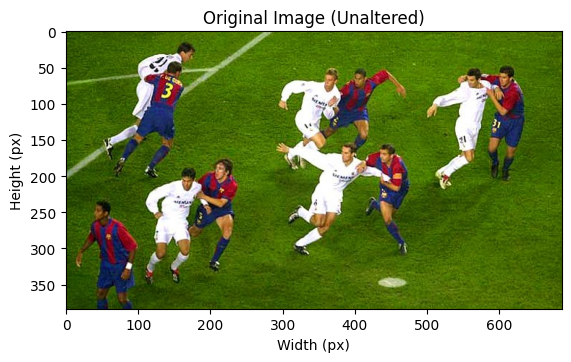

In [3]:
#display image
print("Original Image, Unaltered")
plt.imshow(image)
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.title("Original Image (Unaltered)")

C:\Users\lan\AppData\Local\Temp\ipykernel_8316\407210009.py:20: UserWarning: reconstructed_k1.jpg is a low contrast image
  io.imsave(f'reconstructed_k{k}.jpg', quantized_image)


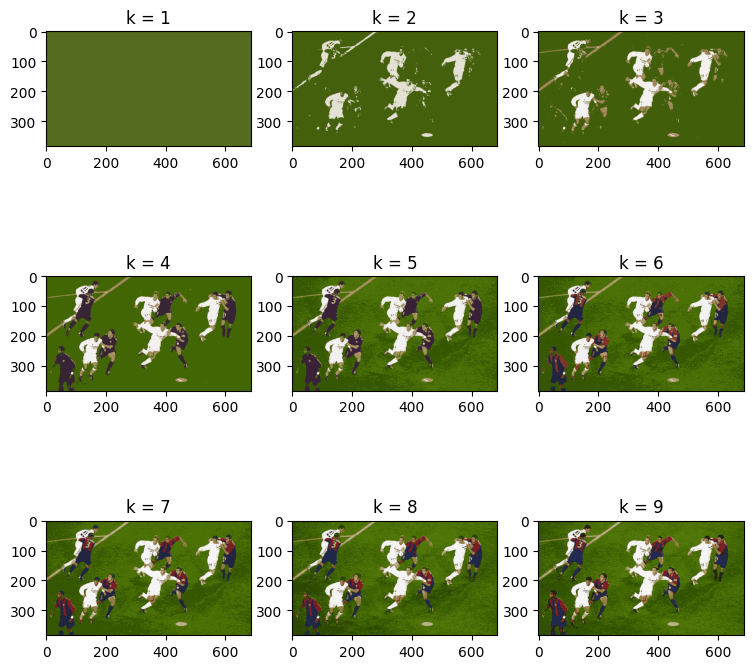

In [8]:
# Define a range of k values to use in model
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create 3 x 3 mosaic figure of the reconstructed images
plt.figure(figsize=(9, 9))

for i, k in enumerate(k_values):
    # Perform color quantization using K-means
    #reshape image to 2D array, as the image is originally 3d because of rgb
    reshaped_image = image.reshape(-1, 3)
    
    #generate kmeans model using k clusters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(reshaped_image) #fit model using image
    
    #quantized image that we will send to the "reciever" to decode. 
    #this replaces each pixel value using nearby centroids
    quantized_image = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)

    # Save the reconstructed image using the codebook
    io.imsave(f'reconstructed_k{k}.jpg', quantized_image)

    # Add image to the mosai
    plt.subplot(3, 3, i + 1)
    plt.imshow(quantized_image)
    plt.title(f'k = {k}')
plt.show()


#### 15% credit. Generate a plot that shows the sum-squared-error (SSE) between the reconstructed image and the original image as a function of k, the number of clusters.  To do so, repeat part (a) several times and, for each k, record the clustering that gives the minimum SSE. Can you make sense of this plot? 

In [5]:
# Reshape the image into a 2D array of pixels
pixels = image.reshape((-1, 3))


# Initialize lists to store SSE and best clusterings
sse_values = []
best_clusterings = []

# Repeat the process several times
num_repeats = 5  # Adjust as needed

for k in k_values:
    sse_per_repeat = []
    clusterings_per_repeat = []
    
    for _ in range(num_repeats):
        # Apply k-means clustering 5 times
        kmeans = KMeans(n_clusters=k, random_state=None, n_init=10)
        labels = kmeans.fit_predict(pixels)

        # Reconstruct the image
        reconstructed_pixels = kmeans.cluster_centers_[labels]
        reconstructed_image = reconstructed_pixels.reshape(image.shape)

        # Calculate SSE
        sse = mean_squared_error(pixels, reconstructed_pixels, multioutput='raw_values').sum()

        sse_per_repeat.append(sse)
        clusterings_per_repeat.append(labels)

    # Store the results for the model w k value 
    # THIS IS WHERE WE CHOOSE THE REPLICATE WITH THE LOWEST SUM SQUARE ERROR
    min_sse_index = np.argmin(sse_per_repeat)
    sse_values.append(sse_per_repeat[min_sse_index])
    best_clusterings.append(clusterings_per_repeat[min_sse_index])

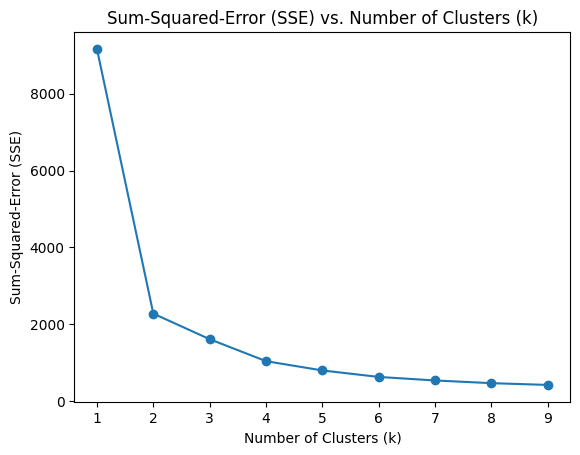

In [6]:
# Plot SSE as a function of k
plt.plot(k_values, sse_values, marker='o')
plt.title('Sum-Squared-Error (SSE) vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum-Squared-Error (SSE)')
plt.show()
